In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols

file = open('billionaires.csv', 'r')

mydat = []

for i in file:
    mydat.append(i)

print(mydat[:3])
file.close()

['"name","rank","year","company.founded","company.name","company.relationship","company.sector","company.type","demographics.age","demographics.gender","location.citizenship","location.country code","location.gdp","location.region","wealth.type","wealth.worth in billions","wealth.how.category","wealth.how.from emerging","wealth.how.industry","wealth.how.inherited","wealth.how.was founder","wealth.how.was political"\n', '"Bill Gates","1","1996","1975","Microsoft","founder"," Software","new","40","male","United States","USA","8100000000000.0","North America","founder non-finance","18.5","New Sectors","True","Technology-Computer","not inherited","True","True"\n', '"Bill Gates","1","2001","1975","Microsoft","founder"," Software","new","45","male","United States","USA","10600000000000.0","North America","founder non-finance","58.7","New Sectors","True","Technology-Computer","not inherited","True","True"\n']


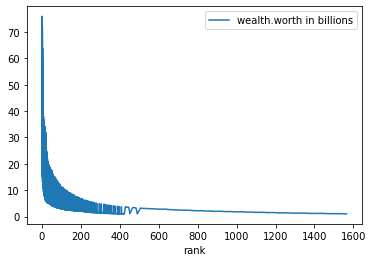

In [5]:
# load file in dataframe
df = pd.read_csv("billionaires.csv")
df.head(3)

log_score = np.log(df[['rank']])

fig = df.plot.line('rank', 'wealth.worth in billions').get_figure()
fig.savefig('test.pdf')


Text(0.5, 0, 'Rank')

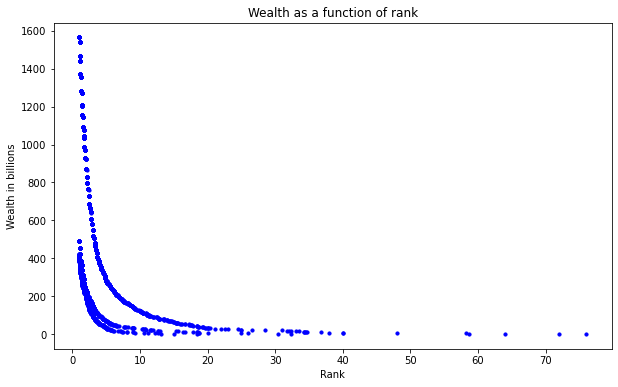

In [11]:
fig, axe = plt.subplots(figsize=(10,6))

axe.scatter(df['wealth.worth in billions'], df['rank'], s = 10, color = 'blue')
axe.set_title('Wealth as a function of rank')
axe.set_ylabel('Wealth in billions')
axe.set_xlabel('Rank')





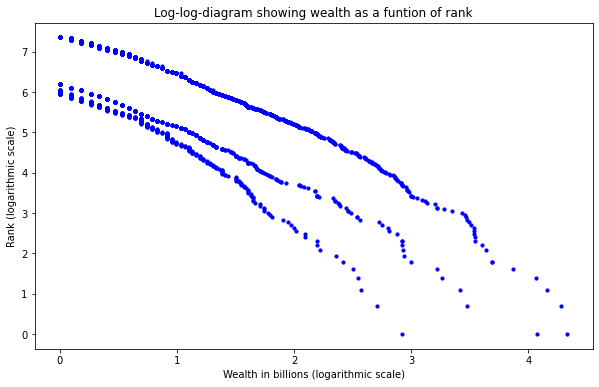

In [75]:
log_worth = np.log(df['wealth.worth in billions'])
log_rank = np.log(df['rank'])

fig, a = plt.subplots(figsize=(10, 6))

a.scatter(log_worth, log_rank, s = 10, color = 'blue')
a.set_title('Log-log-diagram showing wealth as a funtion of rank')
a.set_ylabel('Rank (logarithmic scale)')
a.set_xlabel('Wealth in billions (logarithmic scale)')
plt.savefig('fig1')

In [42]:
dflog = np.log(df[['wealth.worth in billions', 'rank']])
dflog.rename(columns={'wealth.worth in billions': 'wealth'}, inplace=True)
dflog.head()
model = ols(formula='wealth ~ rank', data = dflog).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wealth   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     3817.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:21:22   Log-Likelihood:                -1758.0
No. Observations:                2614   AIC:                             3520.
Df Residuals:                    2612   BIC:                             3532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8612      0.049     78.635      0.000       3.765       3.958
rank          -0.5010      0.008    -61.778      0.000      -0.517      -0.485
==============================================================================
Omnibus:                      379.523   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.313
Skew:                           0.011   Prob(JB):                     1.48e-20
Kurtosis:                       2.085   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$log(wealth) = 3.8612 - 0.501 * log(rank)$$
$$e^{log(wealth)} = e^{3.8612 - 0.501 * log(rank)}$$
$$e^{wealth} = e^{3.8612}*e^{-0.501*log(rank)}$$
$$wealth = 47.5223*rank^{-0.501}$$

In [45]:
wealth_lin_reg = 47.5223*df[['rank']]**(-0.501)
df.insert(loc=1, value=wealth_lin_reg, column = 'lin-reg-wealth')

In [72]:
df.head(2000)

,name,lin-reg-wealth,wealth-reg-rank,lin-reg-rank,linear regression rank,rank,year,company.founded,company.name,company.relationship,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,47.522300,47.522300,34.262878,34.262878,1,1996,1975,Microsoft,founder,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,47.522300,47.522300,8.720393,8.720393,1,2001,1975,Microsoft,founder,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,47.522300,47.522300,6.420914,6.420914,1,2014,1975,Microsoft,founder,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,33.580057,33.580057,43.930212,43.930212,2,1996,1962,Berkshire Hathaway,founder,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,33.580057,33.580057,17.700810,17.700810,2,2001,1962,Berkshire Hathaway,founder,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Bill Adderley,1.466230,1.466230,542.032851,542.032851,1036,2014,1979,Dunelm,founder,...,0.000000e+00,Europe,founder non-finance,1.8,Traded Sectors,True,Consumer,not inherited,True,True
1996,David Nahmad,1.466230,1.466230,542.032851,542.032851,1036,2014,1960,NaN,founder,...,0.000000e+00,Europe,founder non-finance,1.8,0,True,Other,not inherited,True,True
1997,Gerald Schwartz,1.466230,1.466230,542.032851,542.032851,1036,2014,1983,Onex Corporation,founder,...,0.000000e+00,North America,self-made finance,1.8,Financial,True,Money Management,not inherited,True,True
1998,Jayme Garfinkel,1.466230,1.466230,542.032851,542.032851,1036,2014,1945,Porto Seguro Seguros,Chairman and Chief Executive Officer,...,0.000000e+00,Latin America,inherited,1.8,Financial,True,Money Management,father,True,True


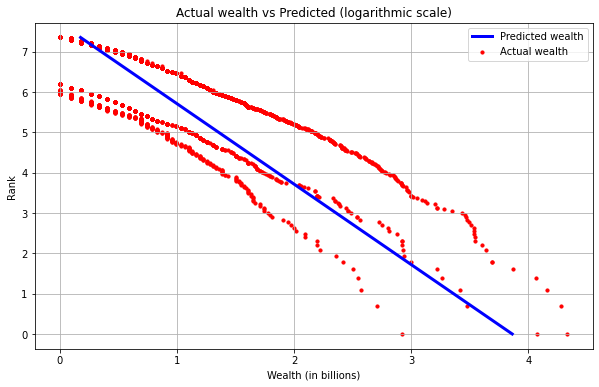

In [74]:
fig, me = plt.subplots(figsize = (10,6))

me.scatter(np.log(df[['wealth.worth in billions']]), np.log(df[['rank']]), s = 10, color = 'red', label = 'Actual wealth')
me.plot(np.log(df[['lin-reg-wealth']]), np.log(df[['rank']]), lw = 3, label = 'Predicted wealth', color = 'blue')
me.legend(loc = 1)
me.grid(True)
me.set_title('Actual wealth vs Predicted (logarithmic scale)')
me.set_ylabel('Rank')
me.set_xlabel('Wealth (in billions)')

plt.savefig('fig2')

